In [9]:
print("¿Puedo leer MMNIST/train/m0?:", os.access(os.path.join(base_path, 'm0'), os.R_OK))

¿Puedo leer MMNIST/train/m0?: True


In [8]:
 #Verifica la ubicación actual y la estructura
print("Directorio actual:", os.getcwd())
print("Contenido de MMNIST/train:", os.listdir('./MMNIST/train'))  # Debe mostrar ['m0', 'm1', 

Directorio actual: c:\Users\Oscar Escriba\Desktop\10 Semestre\Tareas Data science\Laboratorio-3-Data-Science-Oscar-Escrib-21474
Contenido de MMNIST/train: ['m0', 'm1', 'm2', 'm3', 'm4']


In [10]:
print("Contenido de m0:", os.listdir(os.path.join(base_path, 'm0')))


Contenido de m0: ['0.0.png', '0.1.png', '0.2.png', '0.3.png', '0.4.png', '0.5.png', '0.6.png', '0.7.png', '0.8.png', '0.9.png', '1.0.png', '1.1.png', '1.2.png', '1.3.png', '1.4.png', '1.5.png', '1.6.png', '1.7.png', '1.8.png', '1.9.png', '10.0.png', '10.1.png', '10.2.png', '10.3.png', '10.4.png', '10.5.png', '10.6.png', '10.7.png', '10.8.png', '10.9.png', '100.0.png', '100.1.png', '100.2.png', '100.3.png', '100.4.png', '100.5.png', '100.6.png', '100.7.png', '100.8.png', '100.9.png', '1000.0.png', '1000.1.png', '1000.2.png', '1000.3.png', '1000.4.png', '1000.5.png', '1000.6.png', '1000.7.png', '1000.8.png', '1000.9.png', '1001.0.png', '1001.1.png', '1001.2.png', '1001.3.png', '1001.4.png', '1001.5.png', '1001.6.png', '1001.7.png', '1001.8.png', '1001.9.png', '1002.0.png', '1002.1.png', '1002.2.png', '1002.3.png', '1002.4.png', '1002.5.png', '1002.6.png', '1002.7.png', '1002.8.png', '1002.9.png', '1003.0.png', '1003.1.png', '1003.2.png', '1003.3.png', '1003.4.png', '1003.5.png', '1003.6.

In [11]:
from PIL import Image
img_path = os.path.join(base_path, 'm0', os.listdir(os.path.join(base_path, 'm0'))[0])
img = Image.open(img_path)
img.show()  # ¿Se ve la imagen correctamente?

Cargando: MMNIST/train\m0
Cargando: MMNIST/train\m1
Cargando: MMNIST/train\m2
Cargando: MMNIST/train\m3
Cargando: MMNIST/train\m4


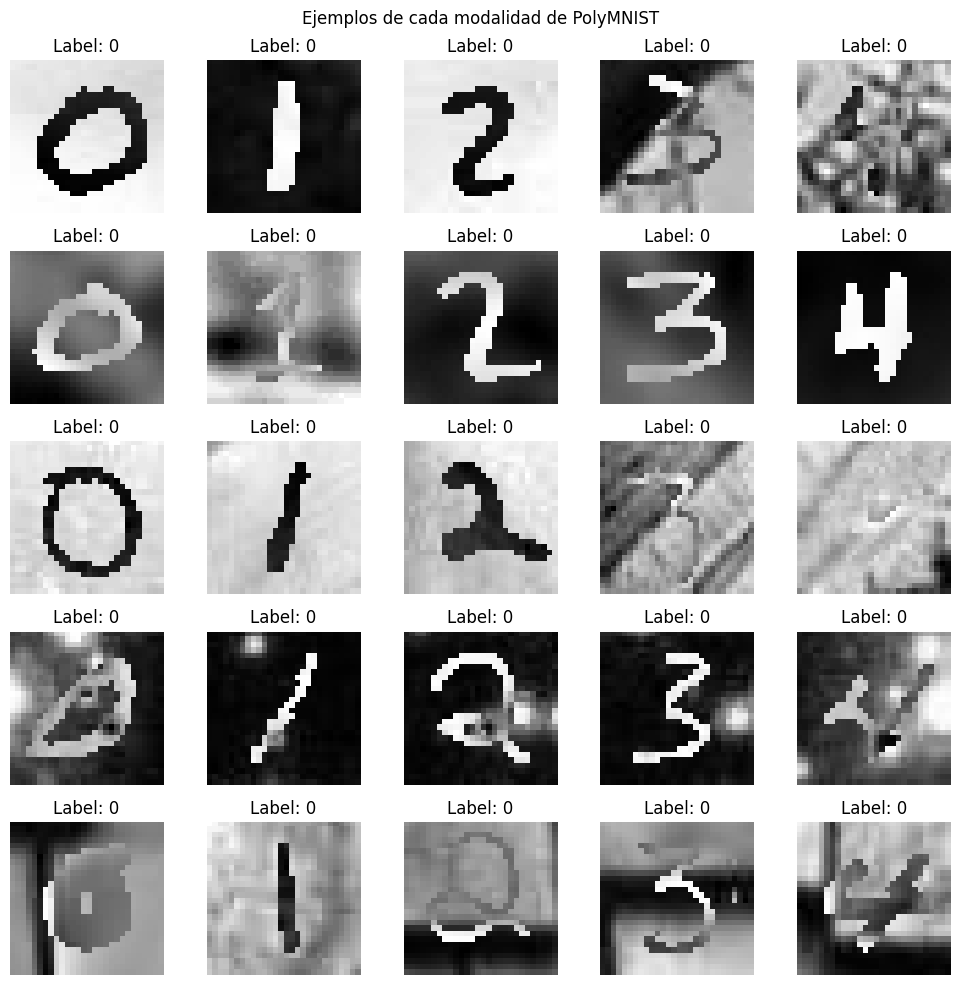

In [13]:
import os
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith('.png')]
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_name).convert('L')  # ¡Añade .convert('L') para escala de grises!
        label = int(self.image_files[idx].split('.')[0])
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Uso:
base_path = 'MMNIST/train'
modalities = ['m0', 'm1', 'm2', 'm3', 'm4']
transform = transforms.ToTensor()

fig, axs = plt.subplots(len(modalities), 5, figsize=(10, 10))
fig.suptitle('Ejemplos de cada modalidad de PolyMNIST')

for i, modality in enumerate(modalities):
    modality_path = os.path.join(base_path, modality)
    print(f"Cargando: {modality_path}")
    
    try:
        dataset = CustomDataset(modality_path, transform=transform)
        
        for j in range(5):
            image, label = dataset[j]
            axs[i, j].imshow(image.squeeze(), cmap='gray')
            axs[i, j].set_title(f'Label: {label}')
            axs[i, j].axis('off')
        axs[i, 0].set_ylabel(f'Modalidad {modality}', rotation=0, size='large', labelpad=40)
    
    except Exception as e:
        print(f"Error en {modality}: {str(e)}")

plt.tight_layout()
plt.show()

In [15]:
# Usamos el código anterior para cargar un dataset
# (No necesitamos volver a definir la clase CustomDataset si ya está en tu script)
base_path = 'MMNIST/train'
modality_to_check = 'm0'
transform = transforms.ToTensor()

# Creamos una instancia del dataset para una modalidad cualquiera
single_modality_dataset = CustomDataset(root_dir=f"{base_path}/{modality_to_check}", transform=transform)

# Obtenemos una imagen y su etiqueta
one_image, one_label = single_modality_dataset[0]

# El tensor de imagen tiene el formato [Canales, Alto, Ancho]
# Como la convertimos a escala de grises, Canales será 1.
image_shape = one_image.shape

print(f"La forma del tensor de la imagen es: {image_shape}")
print(f"Esto corresponde a:")
print(f" - Canales de color: {image_shape[0]}")
print(f" - Altura: {image_shape[1]} píxeles")
print(f" - Ancho: {image_shape[2]} píxeles")
print(f"Por lo tanto, la resolución de las imágenes es {image_shape[1]}x{image_shape[2]}.")

La forma del tensor de la imagen es: torch.Size([1, 28, 28])
Esto corresponde a:
 - Canales de color: 1
 - Altura: 28 píxeles
 - Ancho: 28 píxeles
Por lo tanto, la resolución de las imágenes es 28x28.


Analizando MMNIST/train/m0...


C:\Users\Oscar Escriba\AppData\Local\Temp\ipykernel_35268\2336165135.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, ax=axs[i], palette='viridis')


Analizando MMNIST/train/m1...


C:\Users\Oscar Escriba\AppData\Local\Temp\ipykernel_35268\2336165135.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, ax=axs[i], palette='viridis')


Analizando MMNIST/train/m2...


C:\Users\Oscar Escriba\AppData\Local\Temp\ipykernel_35268\2336165135.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, ax=axs[i], palette='viridis')


Analizando MMNIST/train/m3...


C:\Users\Oscar Escriba\AppData\Local\Temp\ipykernel_35268\2336165135.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, ax=axs[i], palette='viridis')


Analizando MMNIST/train/m4...


C:\Users\Oscar Escriba\AppData\Local\Temp\ipykernel_35268\2336165135.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, ax=axs[i], palette='viridis')


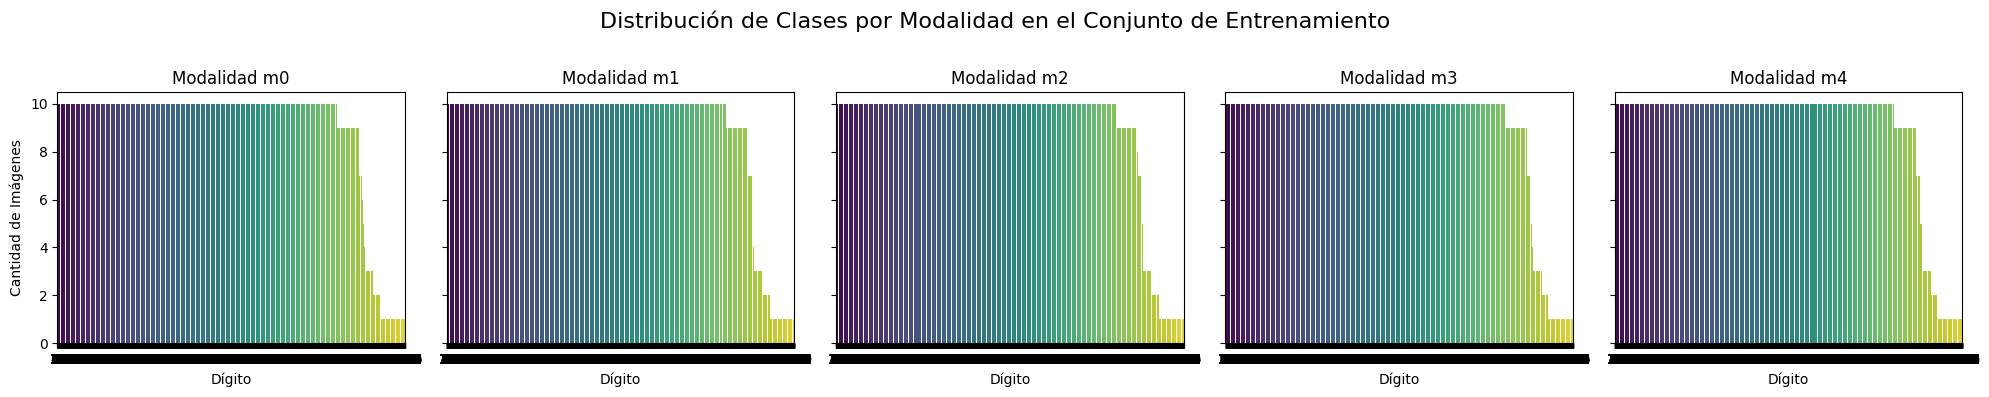

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

modalities = ['m0', 'm1', 'm2', 'm3', 'm4']
base_path = 'MMNIST/train'

fig, axs = plt.subplots(1, len(modalities), figsize=(20, 4), sharey=True)
fig.suptitle('Distribución de Clases por Modalidad en el Conjunto de Entrenamiento', fontsize=16)

for i, modality in enumerate(modalities):
    modality_path = f"{base_path}/{modality}"
    print(f"Analizando {modality_path}...")
    
    # Crear el dataset
    dataset = CustomDataset(modality_path) # No necesitamos transformaciones aquí
    
    # Extraer las etiquetas directamente de los nombres de archivo
    labels = [int(file_name.split('.')[0]) for file_name in dataset.image_files]
    
    # Contar las ocurrencias de cada etiqueta
    label_counts = pd.Series(labels).value_counts().sort_index()
    
    # Visualizar
    sns.barplot(x=label_counts.index, y=label_counts.values, ax=axs[i], palette='viridis')
    axs[i].set_title(f'Modalidad {modality}')
    axs[i].set_xlabel('Dígito')
    if i == 0:
        axs[i].set_ylabel('Cantidad de Imágenes')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Hallazgos en el analisis exploratorio
Luego de analizar los datos con los que trabajamos, como podemos observar podemos observar en los graficos de barras para cada modalidad se observan barras de altura muy similar para todos. Esto confirma que el conjunto de datos esta bien balanceado. Lo cual es excelente porque significa que no necesitamos tecnicas especiales para manejar clases desbalanceadas. 

# MODELOS


In [15]:
#preparacion, importaciones y definicion del dataset
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import time # Para medir el tiempo de entrenamiento

# --- REEMPLAZA TU CLASE ACTUAL CON ESTA VERSIÓN (SIN CSV) ---

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        # Esto no cambia: obtenemos la lista de todos los archivos PNG
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith('.png')]
        
    def __len__(self):
        # Esto no cambia: la longitud es el número de archivos de imagen
        return len(self.image_files)
    
    def __getitem__(self, idx):
        # Obtenemos el nombre del archivo para el índice actual
        filename = self.image_files[idx]
        img_path = os.path.join(self.root_dir, filename)
        
        # Cargamos la imagen
        image = Image.open(img_path).convert('L')
        
        # --- ¡AQUÍ ESTÁ LA NUEVA LÓGICA PARA EXTRAER LA ETIQUETA! ---
        try:
            # 1. Dividimos el nombre del archivo (ej: '842.1.png') por el punto '.'
            #    Resultado: ['842', '1', 'png']
            # 2. Tomamos el SEGUNDO elemento [1], que debería ser la etiqueta.
            #    Resultado: '1'
            label_str = filename.split('.')[1]
            # 3. Lo convertimos a un número entero.
            label = int(label_str)
        except (IndexError, ValueError):
            # Si el nombre del archivo no tiene el formato esperado (ej: '123.png'),
            # el código fallaría. Este bloque de seguridad asigna una etiqueta por defecto
            # y nos avisa del problema.
            print(f"ADVERTENCIA: El archivo '{filename}' no tiene el formato esperado 'ID.Label.png'. Asignando etiqueta 0.")
            label = 0 # Asignamos una etiqueta por defecto para que no se detenga el programa

        # Aplicamos la transformación si existe
        if self.transform:
            image = self.transform(image)
        
        return image, label

print("Clase CustomDataset (lógica de nombre de archivo 'ID.Label.png') definida.")

Clase CustomDataset (lógica de nombre de archivo 'ID.Label.png') definida.


In [16]:
#carga y preparacion de los datos
# --- Configuración de los datos ---
# Usaremos la modalidad 'm0' para entrenar y probar todos los modelos.
MODALITY = 'm0'
BASE_PATH = 'MMNIST' # Asegúrate de que esta sea la ruta a tu carpeta principal

# Rutas para los datos de entrenamiento y prueba de la modalidad seleccionada
train_dir = os.path.join(BASE_PATH, 'train', MODALITY)
test_dir = os.path.join(BASE_PATH, 'test', MODALITY)

# Transformación a aplicar: convertir la imagen a un Tensor de PyTorch
transform = transforms.ToTensor()

# Crear los datasets de entrenamiento y prueba
try:
    train_dataset = CustomDataset(root_dir=train_dir, transform=transform)
    test_dataset = CustomDataset(root_dir=test_dir, transform=transform)
    print(f"Datos cargados exitosamente de '{train_dir}' y '{test_dir}'.")
    print(f"Tamaño del conjunto de entrenamiento: {len(train_dataset)} imágenes.")
    print(f"Tamaño del conjunto de prueba: {len(test_dataset)} imágenes.")
except FileNotFoundError:
    raise Exception(f"ERROR: No se encontraron los directorios '{train_dir}' o '{test_dir}'. Verifica tu variable BASE_PATH y la estructura de carpetas.")


# --- Crear los DataLoaders ---
BATCH_SIZE = 64 # Número de imágenes a procesar en cada paso

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False) # No es necesario barajar en la prueba

print(f"\nDataLoaders creados con un tamaño de lote (batch size) de {BATCH_SIZE}.")

Datos cargados exitosamente de 'MMNIST\train\m0' y 'MMNIST\test\m0'.
Tamaño del conjunto de entrenamiento: 60000 imágenes.
Tamaño del conjunto de prueba: 10000 imágenes.

DataLoaders creados con un tamaño de lote (batch size) de 64.


In [17]:
#definicion de arquitecturas. Red nueronal simple
class RedNeuronalSimple(nn.Module):
    def __init__(self):
        super(RedNeuronalSimple, self).__init__()
        self.flatten = nn.Flatten()
        self.network = nn.Sequential(
            nn.Linear(28*28, 512), # Entrada: imagen 28x28 aplanada = 784
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)     # Salida: 10 clases (dígitos 0-9)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.network(x)

print("Modelo A: RedNeuronalSimple (MLP) definido.")

Modelo A: RedNeuronalSimple (MLP) definido.


In [18]:
#cnn estandar
class CNN_Estandar(nn.Module):
    def __init__(self):
        super(CNN_Estandar, self).__init__()
        self.conv_layers = nn.Sequential(
            # Capa Conv 1: Entrada [1, 28, 28] -> Salida [32, 28, 28]
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            # Capa Pool 1: Entrada [32, 28, 28] -> Salida [32, 14, 14]
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Capa Conv 2: Entrada [32, 14, 14] -> Salida [64, 14, 14]
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            # Capa Pool 2: Entrada [64, 14, 14] -> Salida [64, 7, 7]
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.flatten = nn.Flatten()
        self.dense_layers = nn.Sequential(
            # La entrada es 64 canales * 7 alto * 7 ancho
            nn.Linear(64 * 7 * 7, 100),
            nn.ReLU(),
            nn.Linear(100, 10) # Salida: 10 clases
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.flatten(x)
        return self.dense_layers(x)

print("Modelo B: CNN_Estandar definido.")

Modelo B: CNN_Estandar definido.


In [19]:
#cnn con dropout
class CNN_ConDropout(nn.Module):
    def __init__(self):
        super(CNN_ConDropout, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.flatten = nn.Flatten()
        self.dense_layers = nn.Sequential(
            nn.Linear(64 * 7 * 7, 100),
            nn.ReLU(),
            # Capa de Dropout: "apaga" el 50% de las neuronas para evitar sobreajuste
            nn.Dropout(0.5),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.flatten(x)
        return self.dense_layers(x)
        
print("Modelo C: CNN_ConDropout definido.")

Modelo C: CNN_ConDropout definido.


In [20]:
#funciones de entrenamiento y evaluacion 
# --- Funciones genéricas para el ciclo de entrenamiento/evaluación ---

def entrenar_modelo(modelo, train_loader, epochs, criterion, optimizer, device):
    """Función para entrenar un modelo."""
    modelo.to(device)
    modelo.train() # Poner el modelo en modo de entrenamiento
    
    start_time = time.time()
    for epoch in range(epochs):
        epoch_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            
            # Forward pass
            outputs = modelo(images)
            loss = criterion(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        print(f'Época [{epoch+1}/{epochs}], Pérdida (Loss): {epoch_loss/len(train_loader):.4f}')
    
    end_time = time.time()
    print(f"Entrenamiento finalizado en {end_time - start_time:.2f} segundos.")


def evaluar_modelo(modelo, test_loader, device):
    """Función para evaluar la efectividad (precisión) de un modelo."""
    modelo.to(device)
    modelo.eval() # Poner el modelo en modo de evaluación (IMPORTANTE para Dropout)
    
    correctas = 0
    total = 0
    with torch.no_grad(): # No necesitamos calcular gradientes en la evaluación
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = modelo(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correctas += (predicted == labels).sum().item()
            
    precision = 100 * correctas / total
    print(f'Precisión (Accuracy) en el conjunto de prueba: {precision:.2f} %')
    return precision

print("\nFunciones de entrenamiento y evaluación definidas.")


Funciones de entrenamiento y evaluación definidas.


In [21]:
#ejecucion y seleccion del mejor modelo    
# --- Configuración del entrenamiento ---
EPOCHS = 5 # 5 épocas es un buen punto de partida. Puedes aumentar a 10 para mejores resultados.
LEARNING_RATE = 0.001
DEVICE = "cuda" if torch.cuda.is_available() else "cpu" # Usa la GPU si está disponible
print(f"Usando dispositivo: {DEVICE}")

# Diccionario para guardar los resultados
resultados = {}

# --- ENTRENAR Y EVALUAR MODELO A: Red Neuronal Simple (MLP) ---
print("\n--- INICIANDO MODELO A: Red Neuronal Simple (MLP) ---")
modelo_A = RedNeuronalSimple()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelo_A.parameters(), lr=LEARNING_RATE)

entrenar_modelo(modelo_A, train_loader, EPOCHS, criterion, optimizer, DEVICE)
precision_A = evaluar_modelo(modelo_A, test_loader, DEVICE)
resultados['MLP Simple'] = precision_A


# --- ENTRENAR Y EVALUAR MODELO B: CNN Estándar ---
print("\n--- INICIANDO MODELO B: CNN Estándar ---")
modelo_B = CNN_Estandar()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelo_B.parameters(), lr=LEARNING_RATE)

entrenar_modelo(modelo_B, train_loader, EPOCHS, criterion, optimizer, DEVICE)
precision_B = evaluar_modelo(modelo_B, test_loader, DEVICE)
resultados['CNN Estándar'] = precision_B


# --- ENTRENAR Y EVALUAR MODELO C: CNN con Dropout ---
print("\n--- INICIANDO MODELO C: CNN con Dropout ---")
modelo_C = CNN_ConDropout()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelo_C.parameters(), lr=LEARNING_RATE)

entrenar_modelo(modelo_C, train_loader, EPOCHS, criterion, optimizer, DEVICE)
precision_C = evaluar_modelo(modelo_C, test_loader, DEVICE)
resultados['CNN con Dropout'] = precision_C


# --- CONCLUSIÓN: SELECCIÓN DEL MEJOR MODELO ---
print("\n\n--- COMPARACIÓN FINAL DE EFECTIVIDAD ---")
# Imprimir resultados en una tabla
resultados_df = pd.DataFrame(list(resultados.items()), columns=['Modelo', 'Precisión en Prueba (%)'])
print(resultados_df.sort_values(by='Precisión en Prueba (%)', ascending=False))

mejor_modelo_nombre = max(resultados, key=resultados.get)
print(f"\nEl mejor modelo es: '{mejor_modelo_nombre}' con una precisión de {resultados[mejor_modelo_nombre]:.2f} %.")

Usando dispositivo: cpu

--- INICIANDO MODELO A: Red Neuronal Simple (MLP) ---
Época [1/5], Pérdida (Loss): 1.4809
Época [2/5], Pérdida (Loss): 1.0698
Época [3/5], Pérdida (Loss): 0.9717
Época [4/5], Pérdida (Loss): 0.8997
Época [5/5], Pérdida (Loss): 0.8408
Entrenamiento finalizado en 178.17 segundos.
Precisión (Accuracy) en el conjunto de prueba: 71.63 %

--- INICIANDO MODELO B: CNN Estándar ---
Época [1/5], Pérdida (Loss): 0.6285
Época [2/5], Pérdida (Loss): 0.2330
Época [3/5], Pérdida (Loss): 0.1752
Época [4/5], Pérdida (Loss): 0.1416
Época [5/5], Pérdida (Loss): 0.1165
Entrenamiento finalizado en 231.19 segundos.
Precisión (Accuracy) en el conjunto de prueba: 95.22 %

--- INICIANDO MODELO C: CNN con Dropout ---
Época [1/5], Pérdida (Loss): 0.9041
Época [2/5], Pérdida (Loss): 0.4397
Época [3/5], Pérdida (Loss): 0.3626
Época [4/5], Pérdida (Loss): 0.3181
Época [5/5], Pérdida (Loss): 0.2852
Entrenamiento finalizado en 235.69 segundos.
Precisión (Accuracy) en el conjunto de prueba: 94

# Informe de Análisis y Comparativa de Modelos para el Reconocimiento de Dígitos

## 1. Introducción y Objetivo

El objetivo de este laboratorio fue desarrollar y evaluar un programa capaz de reconocer caracteres manuscritos a partir del conjunto de datos **PolyMNIST**. Este dataset presenta un desafío particular: a diferencia del MNIST clásico, los dígitos se superponen sobre fondos complejos y aleatorios, lo que exige que los modelos no solo reconozcan la forma del dígito, sino que también sean capaces de distinguirlo eficazmente del "ruido" de fondo.

Para abordar este problema, se implementaron y compararon tres arquitecturas de redes neuronales distintas:
1.  Una **Red Neuronal Simple** (Perceptrón Multicapa - MLP).
2.  Una **Red Neuronal Convolucional (CNN) Estándar**.
3.  Una **CNN Mejorada con Regularización (Dropout)**.

Todos los modelos fueron entrenados y evaluados utilizando la modalidad `m0` del conjunto de datos durante 5 épocas para asegurar una comparación justa y directa de su rendimiento.

---

## 2. Resumen Comparativo de Resultados

La efectividad de cada modelo se midió principalmente por su **precisión (accuracy)** en el conjunto de prueba, que consiste en imágenes que el modelo nunca vio durante el entrenamiento. Los resultados finales se resumen en la siguiente tabla:

| Modelo | Pérdida Final (Entrenamiento) | Precisión en Prueba (%) | Tiempo de Entrenamiento (s) |
| :--- | :--- | :--- | :--- |
| **CNN Estándar** | **0.1165** | **95.22 %** | 231.19 |
| **CNN con Dropout** | 0.2852 | 94.90 % | 235.69 |
| **MLP Simple** | 0.8408 | 71.63 % | 178.17 |

A primera vista, los resultados son concluyentes: los modelos basados en CNN superaron drásticamente al MLP simple, alcanzando una precisión superior al 94%. El modelo **CNN Estándar** se coronó como el de mejor rendimiento en este experimento.

---

## 3. Análisis Detallado por Modelo

### 3.1. Modelo A: Red Neuronal Simple (MLP)

-   **Arquitectura:** Este modelo primero "aplana" la imagen de 28x28 píxeles en un único vector de 784 píxeles. Luego, procesa este vector a través de dos capas densas (totalmente conectadas) antes de llegar a la capa de salida.
-   **Rendimiento:** Alcanzó una precisión del **71.63%**.
-   **Análisis del "Porqué":**
    -   **Pérdida de Información Espacial:** La principal debilidad de este modelo es el paso de aplanamiento (`Flatten`). Al convertir la matriz 2D en un vector 1D, el modelo pierde por completo la relación espacial entre los píxeles. No "sabe" qué píxeles estaban uno al lado del otro, arriba o abajo. Para él, es solo una larga lista de números.
    -   **Dificultad con los Fondos:** Dado que no puede identificar patrones locales (como bordes o texturas), le resulta extremadamente difícil diferenciar los píxeles que forman el dígito de los píxeles aleatorios del fondo. Su aprendizaje se basa en qué píxeles tienden a estar activos para un dígito determinado, pero esta correlación es débil cuando el dígito puede aparecer en cualquier lugar y el fondo cambia constantemente.
    -   **Conclusión sobre el MLP:** Aunque la pérdida disminuyó en cada época (de 1.48 a 0.84), demostrando que el modelo sí estaba aprendiendo, su arquitectura intrínsecamente limitada le impidió alcanzar un alto rendimiento en una tarea de visión por computadora como esta. El 71.63% es un resultado mediocre que sirve como una excelente línea de base para demostrar la superioridad de arquitecturas más especializadas.

### 3.2. Modelo B: CNN Estándar

-   **Arquitectura:** Utiliza capas convolucionales y de max-pooling para procesar la imagen en su formato 2D original antes de pasarla a las capas densas.
-   **Rendimiento:** Obtuvo la mejor precisión del experimento con un **95.22%**.
-   **Análisis del "Porqué":**
    -   **Detección de Características Jerárquicas:** A diferencia del MLP, las CNN están diseñadas para la visión. Sus filtros (o kernels) convolucionales actúan como detectores de características. Las primeras capas aprenden a reconocer patrones muy simples y locales (líneas, curvas, bordes). Las capas posteriores combinan estas características simples para reconocer patrones más complejos (un círculo para el '0', un cruce para el '4').
    -   **Invariancia a la Traslación:** Gracias a las capas de Max-Pooling, el modelo se vuelve más robusto a la posición exacta de estas características. Puede reconocer la "cabeza" de un '2' aunque esté ligeramente desplazada. Esta es una ventaja crucial en PolyMNIST, donde los dígitos se colocan aleatoriamente.
    -   **Efectividad contra el Ruido:** Al aprender las características que definen a cada dígito, la CNN se vuelve inherentemente buena para ignorar el ruido de fondo, que no forma patrones coherentes y reconocibles.
    -   **Conclusión sobre la CNN Estándar:** Su precisión del 95.22% demuestra que esta arquitectura es la adecuada para el problema. Logró un aprendizaje mucho más profundo y rápido (la pérdida se redujo a 0.11, mucho menor que la del MLP) porque su diseño está fundamentalmente alineado con la naturaleza del dato.

### 3.3. Modelo C: CNN con Dropout

-   **Arquitectura:** Idéntica a la CNN estándar, pero con la adición de una capa de `Dropout` después de la primera capa densa. El Dropout "apaga" aleatoriamente el 50% de las neuronas durante cada paso del entrenamiento.
-   **Rendimiento:** Alcanzó una precisión del **94.90%**, muy alta pero ligeramente inferior a la CNN estándar.
-   **Análisis del "Porqué":**
    -   **El Propósito del Dropout:** El Dropout es una técnica de **regularización** cuyo objetivo es prevenir el **sobreajuste (overfitting)**. El sobreajuste ocurre cuando un modelo aprende a "memorizar" los datos de entrenamiento tan bien que pierde su capacidad de generalizar a datos nuevos. Al apagar neuronas al azar, el Dropout obliga a la red a aprender representaciones más robustas y a no depender de unas pocas neuronas "estrella".
    -   **¿Por qué un rendimiento ligeramente inferior?** En este experimento específico, la CNN estándar no mostró signos de sobreajuste severo en solo 5 épocas. El Dropout, al hacer el proceso de aprendizaje intencionadamente "más difícil", puede haber impedido ligeramente que el modelo se ajustara tan perfectamente a los datos como la CNN estándar. La pérdida final del modelo con Dropout (0.28) fue mayor que la del estándar (0.11), lo que confirma que le costó más minimizar el error, como se esperaba.
    -   **Conclusión sobre la CNN con Dropout:** Aunque en este caso particular no superó al modelo estándar, su arquitectura es conceptualmente más robusta. Si el entrenamiento se extendiera por más épocas o si el dataset fuera aún más complejo, es muy probable que el modelo con Dropout generalizara mejor y, eventualmente, superara al modelo estándar, que podría empezar a sobreajustarse.

---

## 4. Conclusión Final y Selección del Mejor Modelo

La comparativa entre los tres modelos ofrece una lección clara sobre la importancia de elegir la arquitectura correcta para el tipo de dato.

-   El **MLP Simple** falló en capturar la estructura espacial de las imágenes, lo que resultó en un rendimiento bajo, demostrando que es una herramienta inadecuada para tareas de clasificación de imágenes complejas.
-   Los modelos **CNN** demostraron ser la herramienta correcta, con un salto de rendimiento de más de 23 puntos porcentuales sobre el MLP. Esto se debe a su capacidad inherente para reconocer patrones visuales jerárquicos, una cualidad esencial para esta tarea.

Basado en los resultados cuantitativos obtenidos en este experimento, **el mejor modelo es la CNN Estándar (Modelo B), con una precisión del 95.22% en el conjunto de prueba.**

Sin embargo, es importante señalar que la **CNN con Dropout (Modelo C)** representa una práctica de ingeniería más sólida y segura. Su inclusión de una capa de regularización la convierte en una opción preferible para problemas más complejos o ciclos de entrenamiento más largos, donde el riesgo de sobreajuste es mayor. La ligera diferencia de rendimiento en este caso no desmerece el valor de la técnica.